In [59]:
from utils import TestResults,TrainSplit
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, log_loss
from sklearn.naive_bayes import ComplementNB
import numpy as np
import optuna

In [2]:
X_train, X_test, y_train, y_test = TrainSplit().get_split()

Loading the data
Categorial Feature Imputed


NUM IMPUTE: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 56.29it/s]


Spliting the Data based on time
X_train:(3387880, 80), X_test:(97972, 80) , y_train:(3387880, 2) , y_test:(97972, 2)


In [4]:
cat_feat = TrainSplit.CATEGORIES + TrainSplit.BINARY
num_feat = TrainSplit.NUMERICAL
all_feat = cat_feat + num_feat

In [14]:
help(CategoricalNB)

Help on class CategoricalNB in module sklearn.naive_bayes:

class CategoricalNB(_BaseDiscreteNB)
 |  CategoricalNB(*, alpha=1.0, fit_prior=True, class_prior=None, min_categories=None)
 |  
 |  Naive Bayes classifier for categorical features
 |  
 |  The categorical Naive Bayes classifier is suitable for classification with
 |  discrete features that are categorically distributed. The categories of
 |  each feature are drawn from a categorical distribution.
 |  
 |  Read more in the :ref:`User Guide <categorical_naive_bayes>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : float, default=1.0
 |      Additive (Laplace/Lidstone) smoothing parameter
 |      (0 for no smoothing).
 |  
 |  fit_prior : bool, default=True
 |      Whether to learn class prior probabilities or not.
 |      If false, a uniform prior will be used.
 |  
 |  class_prior : array-like of shape (n_classes,), default=None
 |      Prior probabilities of the classes. If specified the priors are not
 |      adjusted accord

In [60]:
nb_model = ComplementNB(alpha=1)

In [61]:
nb_model.fit(X_train[cat_feat],y_train[TrainSplit.IS_INSTALLED[0]])

ComplementNB(alpha=1)

In [62]:
import pandas as pd
import numpy as np

test = pd.read_csv('../Data/test/000000000000.csv',sep='\t')
test['f_30'].fillna(test['f_30'].mode()[0],inplace=True)
test['f_31'].fillna(test['f_31'].mode()[0],inplace=True)
fmiss = "f_43,f_51,f_58,f_59,f_64,f_65,f_66,f_67,f_68,f_69,f_70".split(',')
for f in fmiss:
    test[f].fillna(test[f].mean(),inplace=True)

In [63]:
for i in range(1,42):
    feat = f"f_{i}"
    out = set(test[feat].unique()) -  set(X_test[feat].unique()).union(set(X_train[feat].unique()))
    if len(out):
        print(feat)
        print(out)
        print("#"*20)

f_1
{67}
####################
f_2
{30041, 6035, 28863}
####################
f_4
{24387, 24333, 14381, 24493, 6230}
####################
f_6
{18433, 7554, 16001, 27784, 30344, 22664, 32267, 24456, 11920, 10385, 27410, 27923, 25364, 1176, 6169, 2843, 14370, 19363, 27428, 27045, 934, 26662, 11172, 11430, 20134, 29603, 25644, 13477, 13695, 32297, 4401, 9011, 437, 5046, 23609, 23228, 2496, 6723, 3652, 13124, 6597, 11983, 3408, 22863, 31440, 28116, 11481, 13274, 9052, 8542, 27231, 19679, 2150, 4072, 1001, 12394, 24811, 20075, 21613, 30959, 30065, 16370, 28660, 31989, 12025, 20858, 19327}
####################
f_13
{19541, 29366}
####################
f_15
{24835, 2563, 3588, 21127, 16135, 8841, 27530, 4363, 6666, 15116, 22286, 7183, 7434, 3474, 9493, 1563, 20128, 8609, 14753, 2084, 22183, 5800, 428, 28980, 4022, 13243, 16318, 19775, 22468, 20166, 30409, 20426, 5328, 14035, 5592, 29659, 7004, 31838, 20703, 13152, 20962, 17125, 17513, 9321, 28267, 4728, 12666, 6384, 17779, 20216, 3577, 16506, 26

In [119]:
out_log = nb_model.predict_log_proba(X_test[cat_feat])

In [120]:
out_pro = nb_model.predict_proba(X_test[cat_feat])

In [121]:
out_log

array([[-8201.64443088,     0.        ],
       [ -359.23899772,     0.        ],
       [    0.        , -6232.90738413],
       ...,
       [    0.        , -2879.81178446],
       [-8318.12946078,     0.        ],
       [-3684.03417666,     0.        ]])

In [123]:
out_pro

array([[0.00000000e+000, 1.00000000e+000],
       [9.64907329e-157, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       ...,
       [1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000]])

In [111]:
out.std()

7.078184835919033

In [112]:
out.mean()

-3.60361112133092

(array([6.000e+00, 7.000e+00, 2.000e+00, 4.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 2.000e+00, 1.000e+00,
        8.000e+00, 9.000e+00, 2.000e+01, 1.700e+01, 5.900e+01, 1.020e+02,
        1.300e+02, 2.120e+02, 4.260e+02, 7.100e+02, 9.880e+02, 1.226e+03,
        1.023e+03, 9.210e+02, 7.280e+02, 4.840e+02, 3.230e+02, 1.980e+02,
        2.390e+02, 3.930e+02, 5.210e+02, 3.940e+02, 1.740e+02, 9.200e+01,
        8.800e+01, 8.100e+01, 1.040e+02, 1.340e+02, 1.340e+02, 1.350e+02,
        1.290e+02, 1.090e+02, 1.070e+0

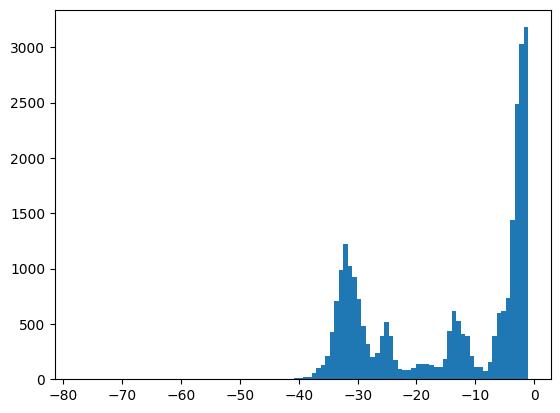

In [118]:
import matplotlib.pyplot as plt
plt.hist(out[out[:,1]<-1,1],bins=100)

In [108]:
log_loss(y_test[TrainSplit.IS_INSTALLED[0]],out[:,1])

6.473640947819223

In [92]:
from sklearn.preprocessing import StandardScaler

In [95]:
sc = StandardScaler()
x = sc.fit_transform(out[:,1].reshape(-1,1))

In [90]:
out[out[:,1].nonzero(),1].shape

(1, 33024)